# Lab 7 - Kalman Filter (Solution)


#### Authors:
v1.0 (2017 Spring) Kamil Nar, Kabir Chandrasekher, David Wang, Tavor Baharav, Sinho Chewi, Kannan Ramchandran

v1.1 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Moulos, Kanaad Parvate, Ray Ramamurti, Kannan Ramchandran


## Self Grades: https://goo.gl/forms/4oywq7yUG12d07Gb2

## Introduction

The Kalman Filter is an algorithm that calculates the LLSE of a linear system. In particular, if a system can recursively be described with an initial condition $X(0)$ and equations
$$X(n) = AX(n-1) + Bu(n-1) + V(n-1)$$
$$Y(n) = CX(n) + W(n)$$
where $X(0)$, $V(0),\dots,V(n)$ and $W(0),\dots,W(n)$ are uncorrelated, then the Kalman Filter calculates $L[X(n) \mid Y(0),\dots,Y(n)]$. We deal with the case where $V$ and $W$ are Guassian, which leads the LLSE to be the MMSE. Because many systems such as the path of a satellite can be described as a linear model, the Kalman Filter is good at tracking objects. To read a bit more on how the Kalman Filter works, open **geometry.ipynb**

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('default')

## 1) Scalar Kalman Filter
Consider a water tank as shown in the figure.

<img src="water_tank.png" style="width:240px;">

State $X(n)$ denotes the water level at time $n$, and $u$ denotes the amount of water flowing into the tank, which we assume to be a constant. Between time $n-1$ and $n$, certain portion of the water is lost through the hole at the bottom of the tank. As a result, we model this system as

$$ X(n) = a X(n-1) + b u + V(n-1), $$

where $a \in (0,1)$ and $b \in (0, \infty)$ are some constants, and $V(n-1)$ is a Gaussian random variable with mean 0 and variance $\Sigma_V$ and independent of $\{X(j)\}_{j=0}^n$ and $\{V(j)\}_{j=0}^{n-1}$.

We monitor the water level with a sensor which gives noisy measurements:

$$ Y(n) = X(n) + W(n),$$

where $W(n)$ is a Gaussian random variable with mean 0 and variance $\Sigma_W$ and independent of $\{X(j)\}_{j=0}^n$, $\{V(j)\}_{j=0}^n$ and $\{W(j)\}_{j=0}^{n-1}$. 

### 1 (a) Predict and Update functions
**Write a function** named <span style="color:blue; font-family:Courier">predict</span> which takes the estimate at time $n-1$, $\hat{\ X}(n-1), \Sigma_{n-1}, \Sigma_V, a$ and $u$ as input, and gives $\hat{\ X}(n \mid n-1)$ and $S_n$ as output as a tuple. **IMPORTANT: In code, $\Sigma_n =$ <span style="font-family:Courier">var_n</span>, with similar variable names for $\Sigma_V$ and $\Sigma_W$. $S_n$ is <span style="font-family:Courier">s_n</span>.**

In [3]:
def predict(X, var_n_minus_1, var_v, a, u):
    #YOUR CODE HERE
    return a*X + u, (a**2)*var_n_minus_1 + var_v

Now **write another function** named <span style="color:blue; font-family:Courier">update</span> which takes $\hat{\ X}(n \mid n-1), Y(n), S_n$ and $\Sigma_W$ as input, and gives $\hat{\ X}(n)$ and $\Sigma_n$ as output as a tuple.

In [4]:
def update(X, Y, s_n, var_w):
    #YOUR CODE HERE
    K_n = s_n/(s_n + var_w)
    return X + K_n*(Y-X), (1-K_n)*s_n

### 1 (b) Low-noise Measurements

First, let's assume $a=0.9$, $u=2$, $X(0) = 11.5$, $\Sigma_V = 3$, $\Sigma_W = 0.4$ and generate some measurements. While our state has a lot of noise, the measurements are accurate. **Just run the cell below**.

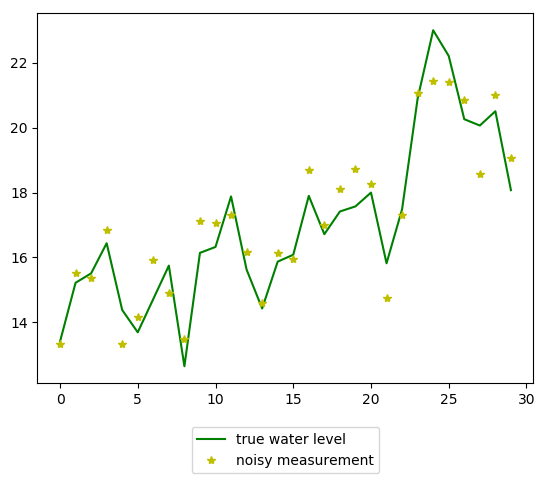

In [5]:
a, u, x_n, sigma_v, sigma_w, = 0.9, 2.0, 11.5, np.sqrt(3), np.sqrt(0.4)
x_true, y, t = np.zeros(30), np.zeros(30), range(30)
for n in t:
    x_n = a*x_n + u + np.random.normal(0.0,sigma_v,1)
    x_true[n] = x_n
    y[n] = x_n + np.random.normal(0.0,sigma_w,1)
plt.plot(t,x_true,'g',label='true water level')
plt.plot(t,y,'y*',label='noisy measurement')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

Now assume $X(0) \sim \mathcal N(10, 2)$ (variance is 2) and find the estimates $\hat{\ X}(n)$ and their variances $\Sigma_{n}$ for $n \in \{1,2, \dots , 30\}$ by using the <span style="color:blue; font-family:Courier">predict</span> and <span style="color:blue; font-family:Courier">update</span> functions you wrote. Save them in the arrays <span style="font-family:Courier">x_hat</span> and <span style="font-family:Courier">var_n</span> of length 30. The observations are saved in an array called <span style="font-family:Courier">y</span>. **Fill out the cell below**.

In [6]:
x_hat = np.zeros(30)
var_n = np.zeros(30)
var_v, var_w = sigma_v**2, sigma_w**2
for n in range(30):
    #YOUR CODE HERE
    if n==0:
        x_pre, s_n = predict(10,2,var_v,a,u)
        x_hat[n], var_n[n] = update(x_pre, y[n],s_n,var_w)
    else:
        x_pre, s_n = predict(x_hat[n-1],var_n[n-1],var_v,a,u)
        x_hat[n], var_n[n] = update(x_pre, y[n],s_n,var_w)
sigma_n = np.sqrt(var_n)   

Let's compare the true values of the states, measurements, and the estimates given by the Kalman filter.

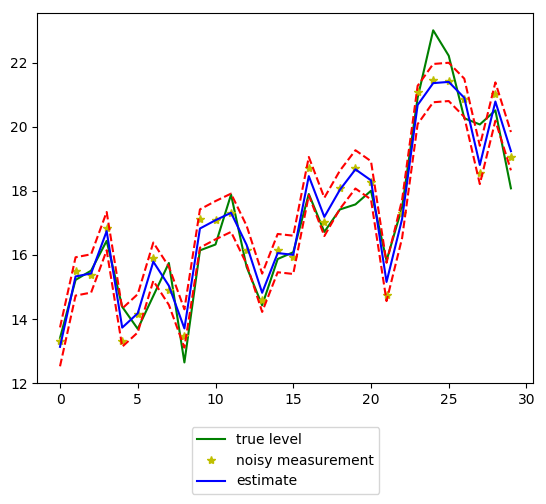

In [7]:
t = range(30)
plt.plot(t,x_true,'g',label='true level')
plt.plot(t,y,'y*',label='noisy measurement')
plt.plot(t,x_hat,'b',label='estimate')
plt.plot(t,x_hat+sigma_n,'r--',t,x_hat-sigma_n,'r--')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

**QUESTION**: Does the estimate follow the "model" more, i.e. what the system naturally does, or the observations? Why is this the case?

The observations, because the noise from the model is more significant than that of the measurement. Unless the observation is high unlikely given the previous states, there's a high chance it'll stay close to it.

### 1 (c) Large-noise Measurements

Now let's assume $a = 0.3$, $u = 14$, $X(0) = 9.0$, $\Sigma_V = 0.5$, $\Sigma_W = 3$ and generate some measurements.

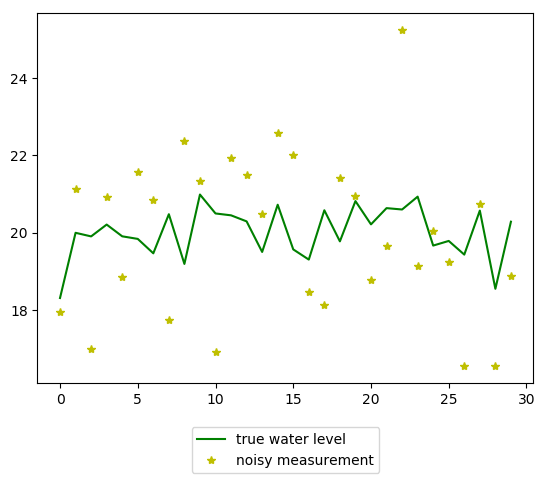

In [8]:
a, u, x_0, sigma_v, sigma_w = 0.3, 14.0, 9.0, np.sqrt(0.5), np.sqrt(3.0)
x_true, y, t = np.zeros(30), np.zeros(30), range(30)
for n in t:
    x_n = a*x_n + u + np.random.normal(0.0,sigma_v,1)
    x_true[n] = x_n
    y[n] = x_n + np.random.normal(0.0,sigma_w,1)
plt.plot(t,x_true,'g',label='true water level')
plt.plot(t,y,'y*',label='noisy measurement')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

As you did in part (b), assume $X(0) \sim \mathcal N(10, 2)$ and find the estimates $\hat{\ X}(n)$ and their variance $\Sigma_n$ for $n \in \{1,2, \dots , 30\}$ by using the <span style="color:blue; font-family:Courier">predict</span> and <span style="color:blue; font-family:Courier">update</span> functions you wrote. **Copy paste your code from the previous part**

In [9]:
x_hat = np.zeros(30)
var_n = np.zeros(30)
var_v, var_w = sigma_v**2, sigma_w**2
for n in range(30):
    #YOUR CODE HERE
    if n==0:
        x_pre, s_n = predict(10,2,var_v,a,u)
        x_hat[n], var_n[n] = update(x_pre, y[n],s_n,var_w)
    else:
        x_pre, s_n = predict(x_hat[n-1],var_n[n-1],var_v,a,u)
        x_hat[n], var_n[n] = update(x_pre, y[n],s_n,var_w)
sigma_n = np.sqrt(var_n)   

Plot the true values of the states, measurements, and the state estimates given by the Kalman filter.

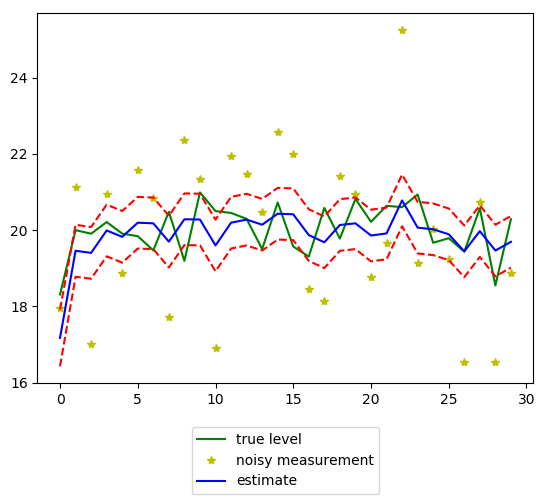

In [10]:
t = range(30)
plt.plot(t,x_true,'g',label='true level')
plt.plot(t,y,'y*',label='noisy measurement')
plt.plot(t,x_hat,'b',label='estimate')
plt.plot(t,x_hat+sigma_n,'r--',t,x_hat-sigma_n,'r--')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

**QUESTION**: Contrast this with the previous example. This time, however, explain the result quantitatively, i.e. in terms of $S_n$, $\Sigma_n$, and $K_n$.

$S_n$ represents the error in $\hat{\ X}(n \mid n-1)$. It won't be as large in the previous case because despite amplifying the error $\Sigma_n$ in $\hat{\ X}(n)$, the contribution from $\Sigma_V$ is small. Because of this, and more importantly the fact that $\Sigma_W$ is large, $K_n = \frac{S_n}{S_n+\Sigma_W}$ will be smaller now. This means that the weight of the innovation will be smaller. $\Sigma_n$ might not change too much since although $S_n$ is smaller $(1-K_n)$ will be larger.

## 2) Tracking an Object

In this section, we will implement a two-dimensional Kalman filter to track an object.

Let $X_1(n)$ and $X_2(n)$ denote the position and the velocity of an object at time $n$. We assume that the position is given in meters, the velocity is in meters-per-second, and a new measurement is taken every second. Therefore, we model the dynamics of the object as

$$ \underbrace{\left[ \begin{array}{c} X_1(n+1) \\ X_2(n+1) \end{array} \right]}_{X(n+1)} = \underbrace{\left[ \begin{array}{l l} 1 & 1 \\ 0 & 1 \end{array} \right]}_{A} \underbrace{\left[ \begin{array}{c} X_1(n) \\ X_2(n) \end{array} \right]}_{X(n)} + \underbrace{\left[ \begin{array}{c} V_1(n) \\ V_2(n) \end{array} \right]}_{V(n)} $$

where $V(n) \sim \mathcal N \left(0, \Sigma_V \right)$ and independent of $\{X(j)\}_{j=0}^n$ and $\{V(j)\}_{j=0}^{n-1}$.

At each time step, we obtain a noisy measurement of the position and the velocity of the object:

$$ Y(n) = \left[ \begin{array}{c} Y_1(n) \\ Y_2(n) \end{array}\right] =  \underbrace{\left[ \begin{array}{c c} 1 & 0 \\ 0 & 1 \end{array} \right]}_{C} X(n)  + \underbrace{\left[ \begin{array}{c} W_1(n) \\ W_2(n) \end{array} \right]}_{W(n)} $$

where $W(n) \sim \mathcal N \left(0, \Sigma_W \right)$ and independent of $\{X(j)\}_{j=0}^n$, $\{V(j)\}_{j=0}^{n}$ and $\{W(j)\}_{j=0}^{n-1}$.

### 2 (a) Standard Kalman Filter
It turns out the that the equations in the vector and scalar case don't look too different, just like how $\frac{cov(X,Y)}{var(Y)}$ and $\Sigma_{X,Y}^{-1} \Sigma_X$ are similar. Refer to section 8.2 (pg. 137) of Walrand's textbook. The apostrophe notation used denotes the transpose of a matrix.

**Write a function** named <span style="color:blue; font-family:Courier">predict2</span> which takes $A, \Sigma_V, \hat{\ X}(n-1), \Sigma_{n-1}$ and outputs $\hat{\ X}(n \mid n-1)$ and $S_n$ as a tuple. **This time, we change the variable names so that $\Sigma_n$ corresponds to <span style="font-family:Courier">Sigma_n</span> and so forth**.

In [11]:
def predict2(A, Sigma_v, X, Sigma_n_minus_1):
    #YOUR CODE HERE
    return np.dot(A,X), np.dot(A, np.dot(Sigma_n_minus_1, A.T)) + Sigma_v

And write a function named <span style="color:blue; font-family:Courier">update2</span> which takes $C, \Sigma_W, \hat{\ X}(n \mid n-1), Y(n), S_n$ as input and gives $\hat{\ X}(n)$, $\Sigma_n$ as an output tuple.

In [11]:
def update2(C, Sigma_w, X, Y, S_n):
    #YOUR CODE HERE
    K = np.dot(np.dot(S_n, C.T), np.linalg.inv(np.dot(C, np.dot(S_n, C.T)) + Sigma_w))
    X_hat = X + np.dot(K, Y - np.dot(C, X))
    Sigma_n = np.dot(np.eye(2) - np.dot(K, C), S_n)
    return X_hat, Sigma_n

### 2 (b) Testing the 2-dimensional Kalman Filter
Let's generate a trajectory for the object with $X(0) = \left[ \begin{array}{c}10 \\ 4 \end{array}\right]$, $\color{red}{\Sigma_V =\left[ \begin{array}{c c}4& 0 \\ 0 & 8 \end{array}\right]}$ and  $\color{red}{\Sigma_W =\left[ \begin{array}{c c}4& 0 \\ 0 & 8 \end{array}\right]}$.

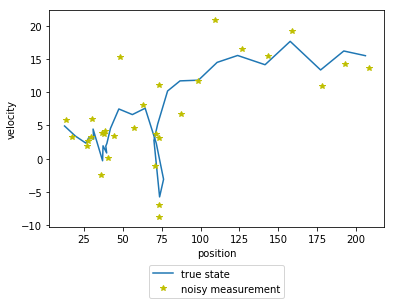

In [12]:
A, C = np.array([[1,1],[0,1]]), np.array([[1,0],[0,1]])
Sigma_v, Sigma_w = np.array([[4,0],[0,8]]), np.array([[4,0],[0,8]])
mean_vec = [0,0]
x_true, y, x, t = np.zeros((2,30)), np.zeros((2,30)), np.array([10,4]), range(30)
for n in t:
    x = A.dot(x) + np.random.multivariate_normal(mean_vec,Sigma_v)
    x_true[:,n] = x
    y[:,n] = x + np.random.multivariate_normal(mean_vec,Sigma_w)

plt.plot(x_true[0,:],x_true[1,:],label='true state')
plt.plot(y[0,:],y[1,:],'y*',label='noisy measurement')
plt.xlabel('position')
plt.ylabel('velocity')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

Note that as long as the velocity of the object stayed positive, the object moved in the positive direction.

**Now find the estimates** $\{\hat{\ X}(n)\}_{n=1}^{30}$ using your functions <span style="color:blue; font-family:Courier">predict2</span> and <span style="color:blue; font-family:Courier">update2</span> with the observations $\{Y(n)\}_{n=1}^{30}$ and

$$A = \left[ \begin{array}{c c}1& 1 \\ 0 & 1 \end{array}\right] , \ 
C = \left[ \begin{array}{c c}1& 0 \\ 0 & 1 \end{array}\right], \ 
\hat{\ X}(0) \sim \mathcal N \left(  \left[ \begin{array}{c}11 \\ 4 \end{array}\right], 
 \left[ \begin{array}{c c}3& 0 \\ 0 & 2 \end{array}\right] \right), \
\color{red}{\Sigma_V =\left[ \begin{array}{c c}4& 0 \\ 0 & 8 \end{array}\right]}, \ \color{red}{\Sigma_W =\left[ \begin{array}{c c}4& 0 \\ 0 & 8 \end{array}\right]}.$$
**Note that <span style="font-family:Courier">X_hat</span> is stored as columns**

In [14]:
X_hat = np.zeros((2, 30))
Sigma_n = np.zeros((30, 2, 2))
for n in range(30):
    ##YOUR CODE HERE
    if n == 0:
        X_0 = np.array([11, 4])
        Sigma_0 = np.array([[3, 0], [0, 2]])
        X_pre, S_n = predict2(A, Sigma_v, X_0, Sigma_0)
        X_hat[:,n], Sigma_n[n] = update2(C, Sigma_w, X_pre, y[:,0], S_n)
    else:
        X_pre, S_n = predict2(A, Sigma_v, X_hat[:,n-1], Sigma_n[n-1])
        X_hat[:,n], Sigma_n[n] = update2(C, Sigma_w, X_pre, y[:,n], S_n)

For comparison, plot the position versus velocity graph of the estimate along with that of the true state.

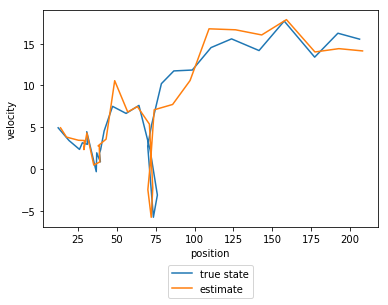

In [15]:
#your plot here
plt.plot(x_true[0,:],x_true[1,:],label='true state')
plt.plot(X_hat[0,:],X_hat[1,:],label='estimate')
plt.xlabel('position')
plt.ylabel('velocity')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

### 2 (c) Effect of Velocity Measurements

How would the estimate change if we measured only the positions? 

To analyze this case, assume that

$$ C = [1 \ \ \ 0], \ \ \ \color{red}{\Sigma_W = [4]}, $$

and you only have access to $\{Y_1(n)\}_{n=1}^{30}$, which are the measurements of the position. Again using your <span style="color:blue; font-family:Courier">predict2</span> and <span style="color:blue; font-family:Courier">update2</span> functions with

$$A = \left[ \begin{array}{c c}1& 1 \\ 0 & 1 \end{array}\right] , \ 
\hat{\ X}(0) \sim \mathcal N \left(  \left[ \begin{array}{c}11 \\ 4 \end{array}\right], 
 \left[ \begin{array}{c c}3& 0 \\ 0 & 2 \end{array}\right] \right), \ 
\color{red}{\Sigma_v =\left[ \begin{array}{c c}4& 0 \\ 0 & 8 \end{array}\right]},$$

find the estimates $\{\hat{\ X}(n)\}_{n=1}^{30}$. 

Note that $\mathbf C$ <b> and </b> $\mathbf{\Sigma_W}$ <b> has changed, and you only have access to the position measurements:</b> $\mathbf{ \{Y_1(n)\}_{n=1}^{30} }$. **Mostly copy paste your code from the previous section, but you'll need to make some changes**

In [16]:
C = np.array([[1, 0]])
Sigma_w2 = np.array([[4]])

X_hat2 = np.zeros((2, 30))
Sigma_n = np.zeros((30, 2, 2))
for n in range(30):
    ##YOUR CODE HERE
    if n == 0:
        X_0 = np.array([11, 4])
        Sigma_0 = np.array([[3, 0], [0, 2]])
        X_pre, S_n = predict2(A, Sigma_v, X_0, Sigma_0)
        X_hat2[:,n], Sigma_n[n] = update2(C, Sigma_w2, X_pre, y[:1,0], S_n)
    else:
        X_pre, S_n = predict2(A, Sigma_v, X_hat2[:,n-1], Sigma_n[n-1])
        X_hat2[:,n], Sigma_n[n] = update2(C, Sigma_w2, X_pre, y[:1,n], S_n)

Plot the position estimates $\{\hat{\ X}_1(n)\}_{n=1}^{30}$ given by part 2(b) and part 2(c) on the same plot, along with the true values <span style="font-family:Courier">x_true</span>.

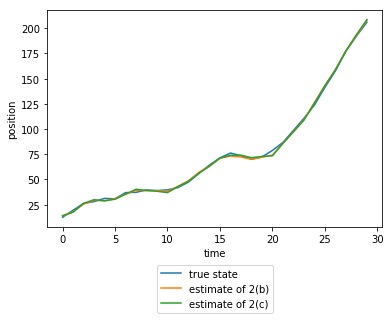

In [17]:
#your code here
#HORIZONTAL AXIS IS TIME
#vertical axis is the position or the position estimate
t = range(30)
plt.plot(t,x_true[0,:],label='true state')
plt.plot(t,X_hat[0,:],label='estimate of 2(b)')
plt.plot(t,X_hat2[0,:],label='estimate of 2(c)')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

**QUESTION**: What's the result? Why might this be the case?

It shouldn't really matter because from taking successive position measurements we should be able to infer the velocity anyway. In EE16B terms, the system is observable.